In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
path = "telegana_field_boundary 1.json"
gdf = gpd.read_file(path)
gdf

,id,FarmID,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry
0,0,1326576,Paddy,Telangana,Medak,Kulcharam,25-11-2023,14-04-2024,97.0,54.0,Pea,Lentil,Transplanting,Flood,Groundwater,4.0,87.0,17.0,Rabi,"POLYGON ((78.18143 17.97888, 78.18149 17.97899..."
1,1,1326577,Paddy,Telangana,Medak,Kulcharam,13-11-2023,26-04-2024,82.0,58.0,Pea,Lentil,Transplanting,Flood,Canal,5.0,94.0,15.0,Rabi,"POLYGON ((78.17545 17.98107, 78.17578 17.98104..."
2,2,1326578,Paddy,Telangana,Medak,Kulcharam,19-12-2023,28-04-2024,92.0,91.0,Pea,Lentil,Transplanting,Flood,Canal,3.0,99.0,20.0,Rabi,"POLYGON ((78.16914 17.97621, 78.1693 17.97619,..."
3,3,1331836,Paddy,Telangana,Medak,Kulcharam,11-02-2023,04-11-2024,91.0,52.0,Pea,Lentil,Transplanting,Flood,Canal,5.0,92.0,16.0,Rabi,"POLYGON ((78.16889 17.97461, 78.16916 17.97471..."
4,4,1326579,Paddy,Telangana,Medak,Kulcharam,12-12-2023,19-05-2024,94.0,55.0,Pea,Lentil,Transplanting,Flood,Canal,5.0,97.0,20.0,Rabi,"POLYGON ((78.17264 17.96925, 78.17276 17.96926..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11786,3011,551119,Maize,Telangana,Nirmal,Sarangapur,12-10-2023,03-07-2024,92.0,225.0,cotton,Maize,Drilling,Drip,Groundwater,4.0,44.0,39.0,Rabi,"POLYGON ((78.25909 19.22659, 78.25924 19.22656..."
11787,3012,916476,Maize,Telangana,Nirmal,Sarangapur,11-05-2023,03-04-2024,79.0,236.0,Soybean,Maize,Seed Drilling,Drip,Canal,3.0,41.0,40.0,Rabi,"POLYGON ((78.2574 19.20149, 78.25735 19.20115,..."
11788,3013,121860,Maize,Telangana,Nirmal,Sarangapur,14-11-2023,04-03-2024,87.0,210.0,cotton,Maize,Broadcasting,Sprinkler,Canal,3.0,43.0,41.0,Rabi,"POLYGON ((78.25711 19.19664, 78.25713 19.19696..."
11789,3014,270936,Maize,Telangana,Nirmal,Sarangapur,12-02-2023,26-03-2024,95.0,204.0,cotton,Maize,Drilling,Sprinkler,Canal,4.0,48.0,39.0,Rabi,"POLYGON ((78.25624 19.19529, 78.25624 19.19498..."


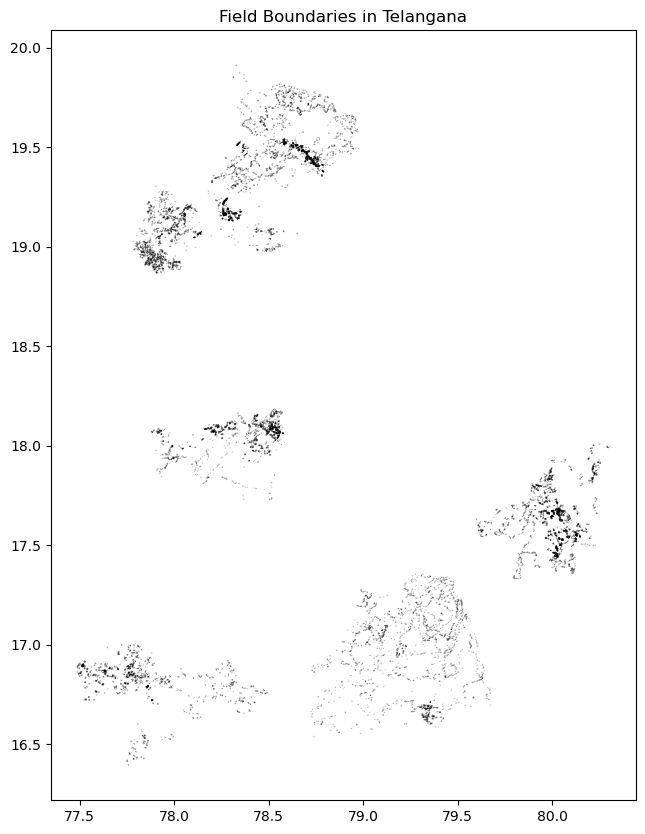

In [20]:
# Plot Field Boundaries on a Map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor="black", alpha=0.5)
ax.set_title("Field Boundaries in Telangana")
plt.show()

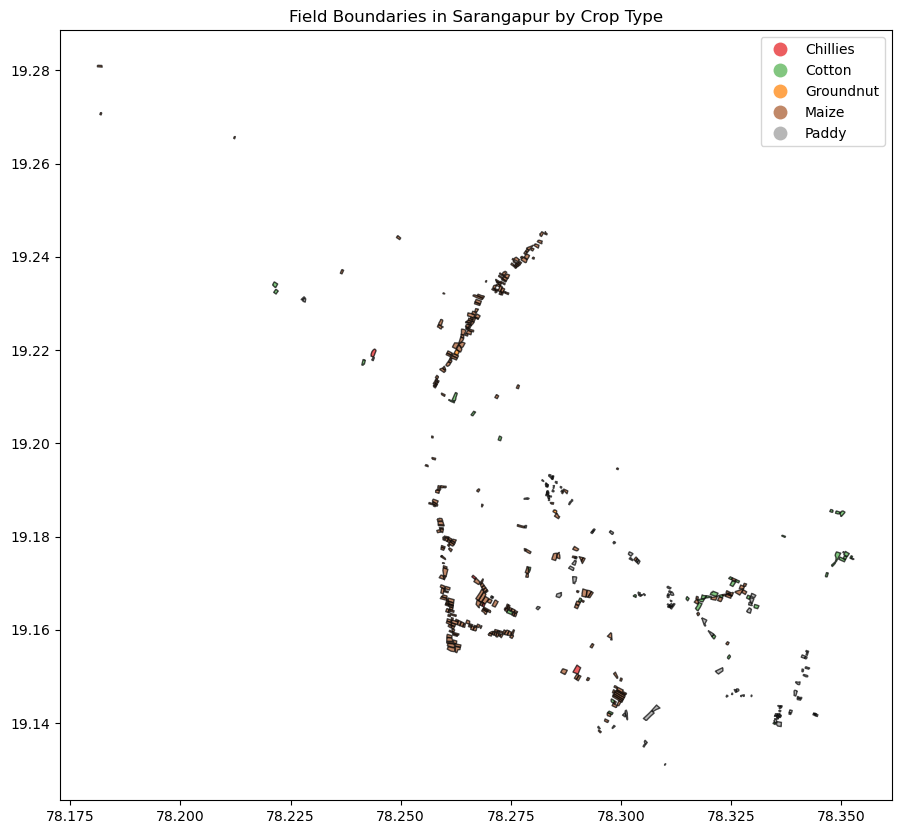

In [21]:
# Filter the dataset for Sarangapur sub-district
gdf_sarangapur = gdf[gdf["Sub-District"] == "Sarangapur"]

# Plot field boundaries color-coded by Crop type
fig, ax = plt.subplots(figsize=(20, 10))
gdf_sarangapur.plot(column="Crop", cmap="Set1", legend=True, ax=ax, edgecolor="black", alpha=0.7)
ax.set_title("Field Boundaries in Sarangapur by Crop Type")
plt.show()


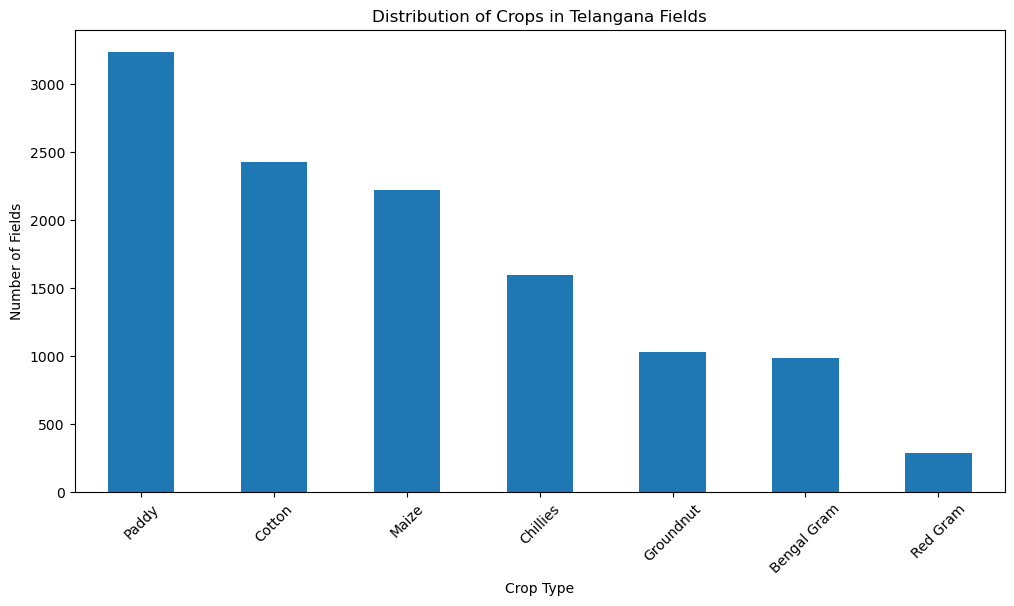

In [22]:
# Bar Chart of Crop Distribution
crop_counts = gdf["Crop"].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
crop_counts.plot(kind="bar", ax=ax)
ax.set_title("Distribution of Crops in Telangana Fields")
ax.set_xlabel("Crop Type")
ax.set_ylabel("Number of Fields")
plt.xticks(rotation=45)
plt.show()

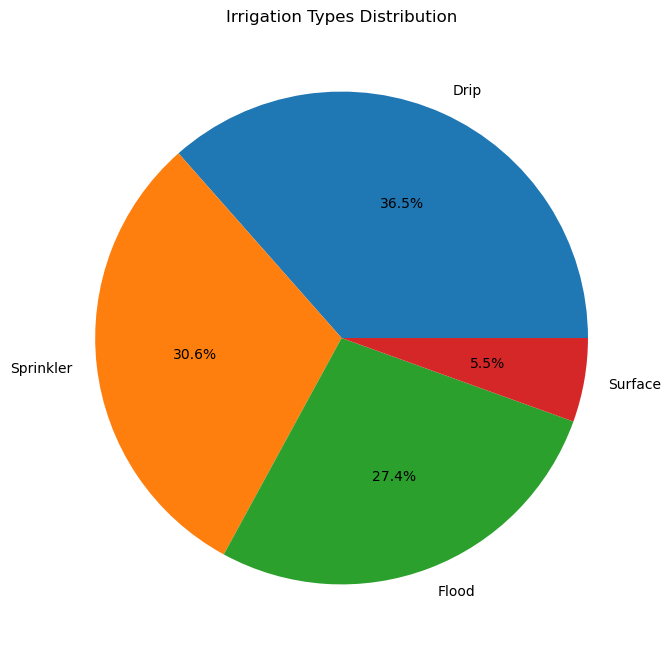

In [23]:
# Pie Chart of Irrigation Types
irri_counts = gdf["IrriType"].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
irri_counts.plot(kind="pie", autopct="%1.1f%%", ax=ax)
ax.set_ylabel("")
ax.set_title("Irrigation Types Distribution")
plt.show()

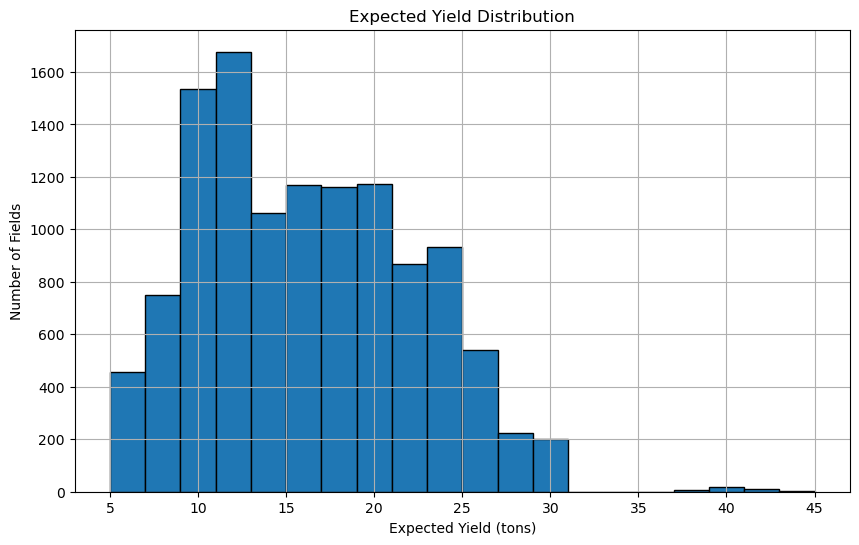

In [24]:
# Histogram of Expected Yield
fig, ax = plt.subplots(figsize=(10, 6))
gdf["ExpYield"].hist(bins=20, edgecolor="black", ax=ax)
ax.set_title("Expected Yield Distribution")
ax.set_xlabel("Expected Yield (tons)")
ax.set_ylabel("Number of Fields")
plt.show()

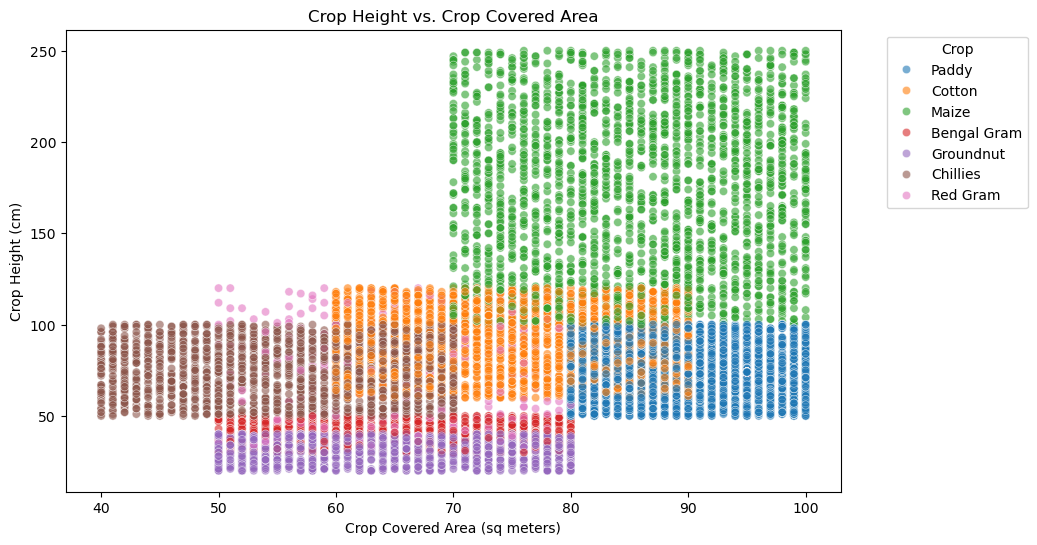

In [25]:
# Scatter Plot of Crop Height vs. Crop Covered Area
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=gdf["CropCoveredArea"], y=gdf["CHeight"], hue=gdf["Crop"], alpha=0.6, ax=ax)
ax.set_title("Crop Height vs. Crop Covered Area")
ax.set_xlabel("Crop Covered Area (sq meters)")
ax.set_ylabel("Crop Height (cm)")
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

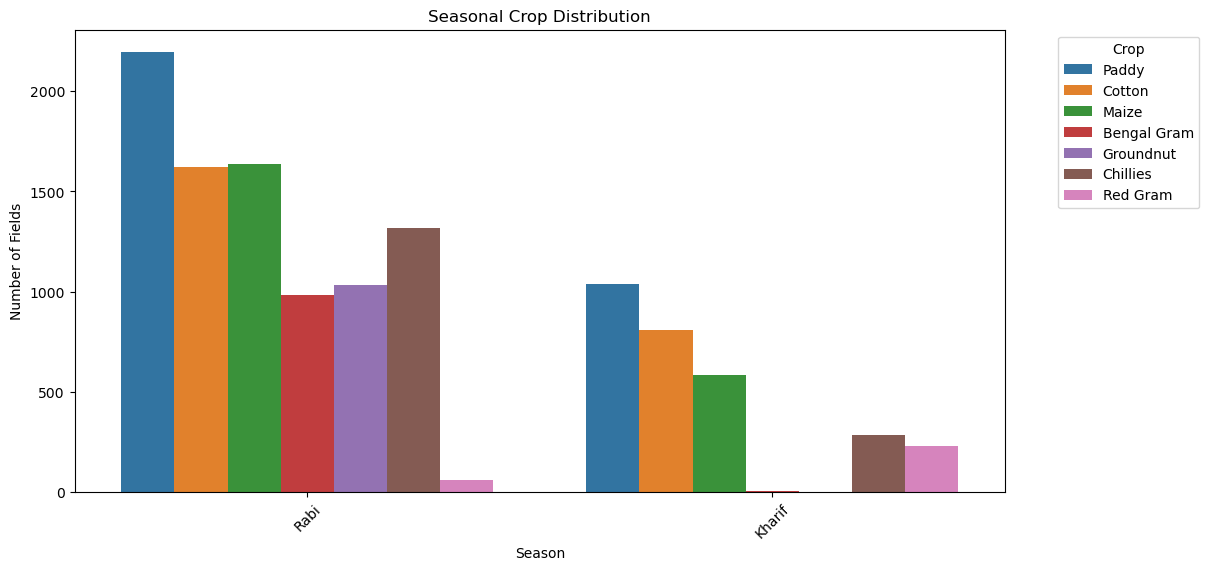

In [26]:
# Seasonal Crop Distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=gdf, x="Season", hue="Crop", ax=ax)
ax.set_title("Seasonal Crop Distribution")
ax.set_xlabel("Season")
ax.set_ylabel("Number of Fields")
plt.xticks(rotation=45)
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

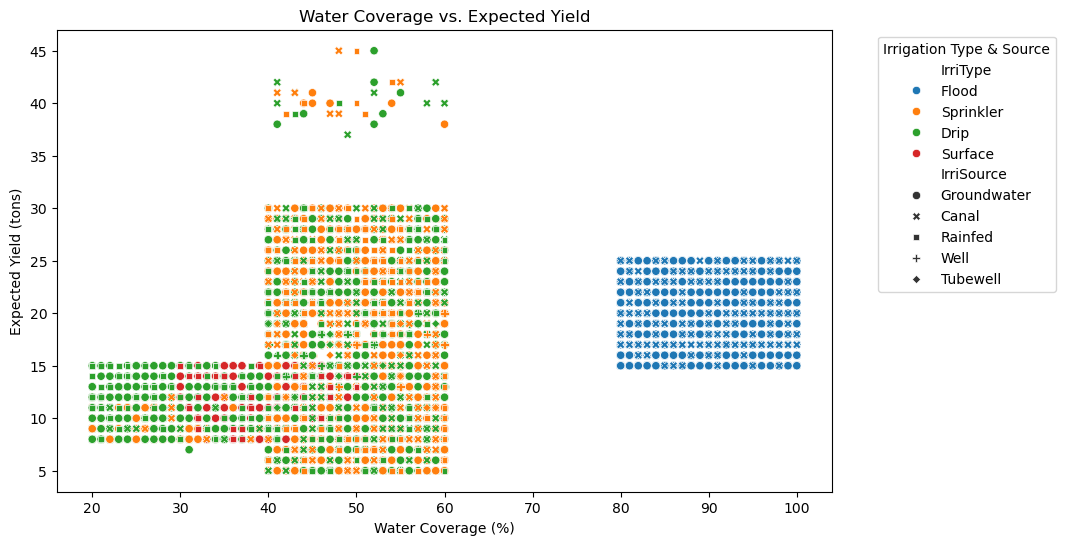

In [27]:
# Water Coverage vs. Expected Yield
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=gdf["WaterCov"], y=gdf["ExpYield"], hue=gdf["IrriType"], style=gdf["IrriSource"], ax=ax)
ax.set_title("Water Coverage vs. Expected Yield")
ax.set_xlabel("Water Coverage (%)")
ax.set_ylabel("Expected Yield (tons)")
plt.legend(title="Irrigation Type & Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()